# WeRateDogs Project

In this Project, I will be gathering, assessing, cleaning and analyzing data from WeRateDogs Twitter archive, an account dedicated to rate dogs in a fun and collaborative environment. WeRateDogs has built a supportive community that suplies hilarious comments and pictures for the world to see and rate under a non-conventional rating system.

#### Table of contents
<ul>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#issue1">Issue 1: None Values</a></li>
<li><a href="#issue2">Issue 2: Denominator</a></li>
<li><a href="#issue3">Issue 3: Numerator</a></li>
<li><a href="#issue4">Issue 4:DataTypes</a></li>
<li><a href="#issue5">Issue 5: Breed Names</a></li>
<li><a href="#issue6">Issue 6: Retweets and Replies</a></li>
<li><a href="#issue7">Issue 7: Dog Names</a></li>
<li><a href="#issue8">Issue 8:Device Info</a></li>
<li><a href="#issue9">Issue 9: Stage Columns</a></li>
<li><a href="#issue10">Issue 10: Merging Datasets</a></li>
<li><a href="#analysis">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#asdfg">XX</a></li>
    
</ul>

<a id='gathering'></a>
# Gathering data 
This project considers data from 3 different sources. In this section, I will be importing the datasets in different DataFrames at first in order to assess, clean and subsequently analyze the data.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_csv("twitter-archive-enhanced.csv")
pd.set_option('display.max_colwidth', 100)
df1.head(10)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/st...",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None


In [126]:
import requests
import os

folder_name = "df_url"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [127]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [128]:
with open (os.path.join(folder_name, url.split("/")[-1]), mode = "wb") as file:
    file.write(response.content)

In [129]:
df2 = pd.read_csv("df_url/image-predictions.tsv", delimiter="\t")
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1655,810284430598270976,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1,malamute,0.620768,True,Eskimo_dog,0.158395,True,Tibetan_mastiff,0.028962,True
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
1854,841077006473256960,https://pbs.twimg.com/media/C6wbE5bXUAAh1Hv.jpg,1,Brittany_spaniel,0.962985,True,Blenheim_spaniel,0.014820,True,clumber,0.009557,True
723,686007916130873345,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,Rhodesian_ridgeback,0.885301,True,redbone,0.042335,True,seat_belt,0.010493,False
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False


Since I was not able to retrieve data from Twitter's API, I imported the json file downloaded from Udacity.

In [130]:
import json
from io import StringIO
from urllib.request import Request, urlopen
datajson = []
with open ("tweet-json.txt") as file:
    for line in file:
        datajson.append(json.loads(line))
df3 = pd.DataFrame(datajson)
pd.options.display.max_columns = 100
display(df3.head(),df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89242063948687...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'med...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89217741319462...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'me...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89181517537179...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'me...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89168955272479...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'med...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], ...","{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'me...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


None

In [131]:
display(df1.head(), df1.shape, df2.head(), df2.shape, df3.head(), df3.shape)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None


(2356, 17)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


(2075, 12)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89242063948687...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'med...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89217741319462...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'me...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89181517537179...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'me...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89168955272479...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'med...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], ...","{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'me...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


(2354, 31)

<a id='assessing'></a>
# Assessing Data

The goal of this section is to asses both visually and programmaticaly the 3 datasets. In the following section -Cleaning- I will address and correct the issues found here.

## DF1

First, I programmatically check for missing values in the DataFrame and duplicates in the most important column "tweet_id".

In [132]:
display(df1.shape, df1.duplicated("tweet_id").sum(), df1.isnull().sum())

(2356, 17)

0

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

No missing values nor duplicates in "tweet_id". Let's proceed with a visual assessment.

In [133]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
525,809084759137812480,NaN,NaN,2016-12-14 17:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wallace. You said you brushed your teeth but he checked your toothbrush and it was bone ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/809084759137812480/photo/1,11,10,Wallace,None,None,None,None
1785,677644091929329666,NaN,NaN,2015-12-18 00:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677644091929329666/video/1,11,10,a,None,None,None,None
848,766069199026450432,NaN,NaN,2016-08-18 00:28:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Juno. She can see your future. 12/10 h*ckin mesmerizing af https://t.co/Z69mShifuk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766069199026450432/photo/1,12,10,Juno,None,None,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently https://t.co/mVf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306246479872/photo/1,10,10,Moose,None,floofer,None,None
877,760893934457552897,NaN,NaN,2016-08-03 17:43:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760893934457552897/photo/1,11,10,Wishes,doggo,None,None,None
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13/10\nhttps://t.co/LEZ8jR5txd,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124273152,13,10,None,None,None,None,None
736,780931614150983680,NaN,NaN,2016-09-28 00:46:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I want to finally rate this iconic puppo who thinks the parade is all for him. 13/10 would absol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614150983680/photo/1,13,10,None,None,None,None,puppo
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hunter. He just found out he needs braces. Requesting an orthodogtist stat. 11/10 you're...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/810896069567610880/photo/1,https://twitter.com/dog_rates/st...",11,10,Hunter,None,None,None,None
473,816336735214911488,NaN,NaN,2017-01-03 17:33:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dudley. He found a flower and now he's a queen. 11/10 would be an honor to pet https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816336735214911488/photo/1,11,10,Dudley,None,None,None,None
1392,700062718104104960,NaN,NaN,2016-02-17 21:02:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Eazy-E. He's colorful af. Must be rare. Submerged in Sprite (rad). Doesn't perform well ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700062718104104960/photo/1,6,10,Eazy,None,None,None,None


From a programmatical standpoint, we don't have any missing values in columns "doggo", "floofer", "puppo" and "pupper". Nevertheless, when we check visually, it is clear that the "None" value in those columns is identified as a value and not a "NaN". Also, these columns refer to the same varible (tidiness issue) that needs to be corrected.

These are issues that will be addressed during cleaning.

In [134]:
doggo = df1[df1["doggo"] == "doggo"]
floofer = df1[df1["floofer"] == "floofer"]
pupper = df1[df1["pupper"] == "pupper"]
puppo = df1[df1["puppo"] == "puppo"]
display(doggo.shape, floofer.shape, pupper.shape, puppo.shape)


(97, 17)

(10, 17)

(257, 17)

(30, 17)

Now, let's check the denominator value in the records from the dataset. According to the instructions of the project, the denominator should always be 10.

In [135]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

As we can see, there are a few records containing different values than 10. We will cover this issue as well.

Let´s check the numerators...

In [136]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

At first glance it looks consistent, but when sampling the dataset I found a record for the numerator variable with decimals in the "text" column.

In [137]:
df1.query("tweet_id == '680494726643068929'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


I will have to set a new RegEx in order to retrieve the full numerator value.

Then, I will inspect if there´s any datatype that needs to be corrected.

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The datatype for timestamp is incorrect, I will change it to datatime in the next section.

Now, let's take a look at retweets and replies in this dataframe.

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

As we can see, there are records with replies (in_reply_to_status_id) and retweets (retweeted_status_id) that need to be removed.

When sampling the dataframe, I found some incorrect dog names.

In [140]:
df1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [141]:
df1.name.isnull().sum()

0

As I visually assessed, there are some incorrect dog names, I will separate the names in lowercase that need to be changed.

In [142]:
df1["wrong_name"] = df1.name.str.extract(r'(^[a-z]{1,10})')
df1.wrong_name.unique()

array([nan, 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptab', 'all', 'old', 'infuriatin', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

Now I will retrieve their index and drop the NaN values in order to identify the during cleaning.

In [143]:
bad = df1.wrong_name.dropna()
bad_index = bad.index
bad_index

Int64Index([  22,   56,  118,  169,  193,  335,  369,  542,  649,  682,
            ...
            2335, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2353, 2354],
           dtype='int64', length=109)

These incorrect names might be caused by an imprecise RegEx used to extract the names. I will try to correct this issue in the next section.

## DF2

Same as in DF1, I will check for missing values and/or repetitions in the most important column "tweet_id".

In [144]:
display(df2.shape, df2.duplicated("tweet_id").sum(), df2.isnull().sum())

(2075, 12)

0

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

Great, no missing values when checking programmatically. Let's review visually...

In [145]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


We can see that the breed names from columns "p1", "p2" and "p3" are inconsistent in uppercases and underscores. I will address this in the next section.

## DF3

We repeat the search for missing values and repetitions from the other 2 DataFrames.

In [146]:
display(df3.shape, df3.duplicated("id").sum(), df3.isnull().sum())

(2354, 31)

0

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

No repetitions or missing values in "id" column. I will need to retrieve the source device the tweets were made from. I will get this information in the cleaning section.

<a id='cleaning'></a>
# Cleaning Data

In this section I will be cleaning the issues found in the "Assessing Data" section using the "define, code and test" methodology. After the correction of the identified issues, I will save the master DataFrame (the inner join of the 3 datasets) in a CSV file.

Fisrt, I will create copies of the Dataframes to clean them without modifying the original data.

In [202]:
df1clean = df1.copy()
df2clean = df2.copy()
df3clean = df3.copy()

<a id='issue1'></a>
###### Issue 1

Define: Replace “None” values for “NaN” in columns “puppo”, “pupper”, “doggo” and “floofer" of df1.

Code:

In [203]:
df1clean.doggo.replace(to_replace=["None"], value=np.nan, inplace=True)

Test:

In [204]:
df1clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                         2259
floofer                          0
pupper                           0
puppo                            0
wrong_name                    2247
dtype: int64

Since it worked, I will replace the remaining columns with NaN.

In [205]:
df1clean.floofer.replace(to_replace=["None"], value=np.nan, inplace=True)
df1clean.pupper.replace(to_replace=["None"], value=np.nan, inplace=True)
df1clean.puppo.replace(to_replace=["None"], value=np.nan, inplace=True)

In [206]:
df1clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
wrong_name                    2247
dtype: int64

<a id='issue2'></a>
###### Issue 2

Define: Correct every denominator value greater than 10 in column "ratings_denominators" from df1.

Code

In [207]:
df1clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [208]:
df1clean["rating_denominator"].replace(to_replace=df1clean.rating_denominator.unique(),value=10, inplace = True)

Test:

In [209]:
df1clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

<a id='issue3'></a>
###### Issue 3

Define: compare the rating_numerator values with my own RegEx value. Replace th column if they are different.

Code:

In [210]:
df1clean["rating_numerator"] = df1clean["rating_numerator"].astype(str)
df1clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator               object
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
wrong_name                     object
dtype: object

In [211]:
df1clean["actual_numerator"] = df1clean["text"].str.extract(r'(\d{1,3}\.\d{1,3})')
df1clean.sample(5)
display(df1clean.actual_numerator.value_counts(), df1clean.rating_numerator.value_counts())


9.75     2
8.98     1
11.27    1
92.49    1
4.3      1
9.5      1
2.4      1
2.0      1
5.7      1
13.5     1
11.26    1
Name: actual_numerator, dtype: int64

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
420       2
15        2
75        2
165       1
17        1
27        1
50        1
143       1
80        1
60        1
144       1
45        1
26        1
666       1
88        1
121       1
182       1
84        1
20        1
204       1
1776      1
99        1
24        1
44        1
960       1
Name: rating_numerator, dtype: int64

Since the original column lacks of decimal values, I will replace them in rating_numerator column.

In [212]:
df1clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,wrong_name,actual_numerator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,NaN,NaN,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991...",13,10,Jax,NaN,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/st...",13,10,None,NaN,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN,NaN,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,NaN,NaN,NaN,NaN,NaN


In [213]:
df1clean["actual_numerator"].replace(to_replace = np.nan, value = -1, inplace = True)
df1clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,wrong_name,actual_numerator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,-1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,-1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,NaN,-1
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,NaN,-1
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,NaN,NaN,NaN,NaN,NaN,-1


In [214]:
for i in range(len(df1clean.axes[0])):
    if df1clean.actual_numerator[i] == -1:
        df1clean.actual_numerator[i] = df1clean.rating_numerator[i]
        
       


<ipython-input-214-f0682b9a697f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1clean.actual_numerator[i] = df1clean.rating_numerator[i]


Test:

In [215]:
df1clean.actual_numerator.value_counts()

12       557
11       463
10       461
13       349
9        156
8        102
7         55
14        54
5         35
6         32
3         19
4         17
1          9
2          9
0          2
9.75       2
15         2
420        2
13.5       1
2.0        1
50         1
2.4        1
11.27      1
143        1
80         1
9.5        1
165        1
17         1
5.7        1
144        1
45         1
4.3        1
8.98       1
44         1
24         1
99         1
1776       1
204        1
20         1
84         1
182        1
60         1
121        1
92.49      1
88         1
960        1
666        1
11.26      1
Name: actual_numerator, dtype: int64

<a id='issue4'></a>
###### Issue 4

Define: Change datatypes from object to datetime for "created at" and "timestamp" columns.

Code: 

In [216]:
df1clean["timestamp"] = pd.to_datetime(df1clean["timestamp"])
df3clean["created_at"] = pd.to_datetime(df3clean["created_at"])

Test:

In [286]:
display(df1clean.info(), df3clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   object             
 4   rating_denominator  2097 non-null   int64              
 5   name                1350 non-null   object             
 6   actual_numerator    2097 non-null   object             
 7   stages              2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 131.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id 

None

None

<a id='issue5'></a>
###### Issue 5

Define: Standardize breed names in p1, p2 and p3 columns from df2 (uppercase and space instead of underscore). 

Code:

In [218]:
df2clean["p1"] = df2clean["p1"].astype(str)
df2clean["p1"] = df2clean["p1"].replace(r"_", " ", regex=True)
df2clean["p1"] = df2clean.p1.str.title()

df2clean["p2"] = df2clean["p2"].astype(str)
df2clean["p2"] = df2clean["p2"].replace(r"_", " ", regex=True)
df2clean["p2"] = df2clean.p2.str.title()

df2clean["p3"] = df2clean["p3"].astype(str)
df2clean["p3"] = df2clean["p3"].replace(r"_", " ", regex=True)
df2clean["p3"] = df2clean.p3.str.title()

Test:

In [219]:
df2clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
804,691675652215414786,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,Chihuahua,0.182898,True,Teddy,0.128077,False,West Highland White Terrier,0.097875,True
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,Malamute,0.375098,True,Jean,0.069362,False,Keeshond,0.050528,True
1256,748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/748568890477789184/pu/img/1MzP7FuodJdHw8zA.jpg,1,Tibetan Terrier,0.328161,True,Toy Poodle,0.304836,True,Miniature Poodle,0.070878,True
1391,766793450729734144,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,1,Beagle,0.451697,True,Basset,0.197513,True,Bloodhound,0.072699,True
1579,796177847564038144,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,Golden Retriever,0.600276,True,Labrador Retriever,0.140798,True,Seat Belt,0.087355,False


<a id='issue6'></a>
###### Issue 6

Define: Delete every record that is a retweet or reply from df1.

Code:

In [220]:
df1clean.in_reply_to_status_id.replace(to_replace = np.nan, value = -1, inplace=True)
df1clean.in_reply_to_status_id.value_counts()

-1.000000e+00    2278
 6.671522e+17       2
 6.737159e+17       1
 6.753494e+17       1
 6.754971e+17       1
                 ... 
 8.707262e+17       1
 8.482121e+17       1
 6.715449e+17       1
 6.936422e+17       1
 8.406983e+17       1
Name: in_reply_to_status_id, Length: 78, dtype: int64

In [221]:
df1clean.retweeted_status_id.replace(to_replace = np.nan, value = -1, inplace=True)
df1clean.retweeted_status_id.value_counts()

-1.000000e+00    2175
 7.507196e+17       1
 6.742918e+17       1
 6.833919e+17       1
 8.269587e+17       1
                 ... 
 7.848260e+17       1
 7.806013e+17       1
 8.305833e+17       1
 7.047611e+17       1
 7.909461e+17       1
Name: retweeted_status_id, Length: 182, dtype: int64

In [222]:
replies = df1clean.query("in_reply_to_status_id != -1")
replies

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,wrong_name,actual_numerator
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extrem...,-1.0,NaN,NaN,NaN,12,10,None,NaN,NaN,NaN,NaN,NaN,12
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,-1.0,NaN,NaN,NaN,17,10,None,NaN,NaN,NaN,NaN,NaN,17
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,-1.0,NaN,NaN,NaN,14,10,None,NaN,NaN,NaN,NaN,NaN,14
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,-1.0,NaN,NaN,NaN,10,10,None,NaN,NaN,NaN,NaN,NaN,10
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy c...",-1.0,NaN,NaN,NaN,12,10,None,NaN,NaN,NaN,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you loo...,-1.0,NaN,NaN,NaN,1,10,None,NaN,NaN,NaN,NaN,NaN,1
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug...,-1.0,NaN,NaN,NaN,11,10,None,NaN,NaN,NaN,NaN,NaN,11
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,NaN,NaN,NaN,NaN,NaN,10
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,-1.0,NaN,NaN,NaN,12,10,None,NaN,NaN,NaN,NaN,NaN,12


In [223]:
retweets = df1clean.query("retweeted_status_id != -1")
retweets 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,wrong_name,actual_numerator
19,888202515573088257,-1.0,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/1...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/st...",13,10,Canela,NaN,NaN,NaN,NaN,NaN,13
32,886054160059072513,-1.0,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886...",12,10,None,NaN,NaN,NaN,NaN,NaN,12
36,885311592912609280,-1.0,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 woul...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/st...",13,10,Lilly,NaN,NaN,NaN,NaN,NaN,13
68,879130579576475649,-1.0,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her ...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/st...",14,10,Emmy,NaN,NaN,NaN,NaN,NaN,14
73,878404777348136964,-1.0,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. S...",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,NaN,NaN,NaN,NaN,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,-1.0,NaN,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he w...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,NaN,NaN,NaN,NaN,NaN,10
1043,743835915802583040,-1.0,NaN,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own ...,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,NaN,NaN,NaN,NaN,NaN,10
1242,711998809858043904,-1.0,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveTwitter https://t.co/j6FQGhxYuN,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,"https://twitter.com/twitter/status/711998279773347841/photo/1,https://twitter.com/twitter/status...",12,10,None,NaN,NaN,NaN,NaN,NaN,12
2259,667550904950915073,-1.0,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12...",6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,"https://twitter.com/

In [224]:
reply_rows=replies.index
retweets_rows = retweets.index

In [225]:
df1clean.drop(reply_rows, inplace=True)
df1clean.drop(retweets_rows, inplace=True)

Test:

In [226]:
df1clean.in_reply_to_status_id.value_counts()

-1.0    2097
Name: in_reply_to_status_id, dtype: int64

In [227]:
df1clean.retweeted_status_id.value_counts()

-1.0    2097
Name: retweeted_status_id, dtype: int64

In [228]:
df1clean.reset_index(inplace = True)


In [229]:
df1clean.head(31)

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,wrong_name,actual_numerator
0,0,892420643555336193,-1.0,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,13
1,1,892177421306343426,-1.0,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",-1.0,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,13
2,2,891815181378084864,-1.0,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,NaN,12
3,3,891689557279858688,-1.0,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,NaN,13
4,4,891327558926688256,-1.0,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",-1.0,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,NaN,NaN,NaN,NaN,NaN,12
5,5,891087950875897856,-1.0,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN,NaN,NaN,NaN,NaN,13
6,6,890971913173991426,-1.0,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,-1.0,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991...",13,10,Jax,NaN,NaN,NaN,NaN,NaN,13
7,7,890729181411237888,-1.0,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you...,-1.0,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/st...",13,10,None,NaN,NaN,NaN,NaN,NaN,13
8,8,890609185150312448,-1.0,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettabl...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN,NaN,NaN,NaN,NaN,13
9,9,890240255349198849,-1.0,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theor...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,NaN,NaN,NaN,NaN,14


<a id='issue7'></a>
###### Issue 7

Define: Apply a new RegEx and correct dog names in df1.

Code:

In [230]:
for i in range(len(df1clean.axes[0])):
    if df1clean.name.index[i] in bad_index or df1clean.name[i] == "None":
        df1clean.name.replace(to_replace = df1clean.name[i], value = "temp_name", inplace = True)
        
               
        

In [231]:
temporal = df1clean.query("name == 'temp_name'")
display(temporal.sample(5), temporal.shape)

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,wrong_name,actual_numerator
933,1150,726224900189511680,-1.0,NaN,2016-04-30 01:41:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I'm getting super heckin frustrated with you all sending in non canines like this ostrich. We on...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/726224900189511680/photo/1,9,10,temp_name,NaN,NaN,NaN,NaN,NaN,9
1889,2142,669972011175813120,-1.0,NaN,2015-11-26 20:12:29+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see really big dog cuddling smaller dog. Very touching. True friendship. 10/10s would pe...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/669972011175813120/photo/1,10,10,temp_name,NaN,NaN,NaN,NaN,NaN,10
1655,1903,674638615994089473,-1.0,NaN,2015-12-09 17:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper is fed up with being tickled. 12/10 I'm currently working on an elaborate heist to s...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/674638615994089473/photo/1,12,10,temp_name,NaN,NaN,pupper,NaN,NaN,12
801,1011,747439450712596480,-1.0,NaN,2016-06-27 14:40:26+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Linus. He just wanted to say hello but no one's paying attention. 12/10 (vid by @rebecca...,-1.0,NaN,NaN,https://vine.co/v/5uTVXWvn3Ip,12,10,temp_name,NaN,NaN,NaN,NaN,NaN,12
572,746,780074436359819264,-1.0,NaN,2016-09-25 16:00:13+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a doggo questioning his entire existence. 10/10 someone tell him he's a good boy https:/...,-1.0,NaN,NaN,https://vine.co/v/5nzYBpl0TY2,10,10,temp_name,doggo,NaN,NaN,NaN,NaN,10


(768, 20)

In [232]:
named_df = temporal[temporal.text.str.contains("named")]
named_df
name_is_df = temporal[temporal.text.str.contains("name is")]
name_is_df

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,wrong_name,actual_numerator
32,35,885518971528720385,-1.0,NaN,2017-07-13 15:19:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,-1.0,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,temp_name,NaN,NaN,NaN,NaN,NaN,14
140,168,859607811541651456,-1.0,NaN,2017-05-03 03:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13,10,temp_name,NaN,NaN,NaN,puppo,NaN,13
1441,1678,682047327939461121,-1.0,NaN,2015-12-30 03:55:29+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 1...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10,10,temp_name,NaN,NaN,NaN,NaN,NaN,10
1496,1734,679736210798047232,-1.0,NaN,2015-12-23 18:51:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 wou...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,temp_name,NaN,NaN,NaN,NaN,NaN,9
2009,2267,667524857454854144,-1.0,NaN,2015-11-20 02:08:22+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af....,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,temp_name,NaN,NaN,NaN,NaN,NaN,12
2029,2287,667177989038297088,-1.0,NaN,2015-11-19 03:10:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by...,-1.0,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8,10,temp_name,NaN,NaN,NaN,NaN,a,8


In [233]:
named_index = named_df.index
named_index
name_is_index = name_is_df.index
name_is_index

Int64Index([32, 140, 1441, 1496, 2009, 2029], dtype='int64')

In [234]:
for i in range(len(temporal.axes[0])):
    if temporal.index[i] in named_index:
        temporal["name"]= temporal["text"].str.extract(r'(named [A-Z][a-z]+\.)')
        temporal["name"]= temporal["name"].str.extract(r'([A-Z][a-z]+\.)')
        temporal["name"]= temporal["name"].str.extract(r'([A-Z][a-z]+[^\.])')
    if temporal.index[i] in name_is_index:
        temporal["name"]= temporal["text"].str.extract(r'(name is [A-Z][a-z]+\.)')
        temporal["name"]= temporal["name"].str.extract(r'([A-Z][a-z]+\.)')
        temporal["name"]= temporal["name"].str.extract(r'([A-Z][a-z]+[^\.])')
    

<ipython-input-234-42dfa730ceb3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal["name"]= temporal["text"].str.extract(r'(name is [A-Z][a-z]+\.)')
<ipython-input-234-42dfa730ceb3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal["name"]= temporal["name"].str.extract(r'([A-Z][a-z]+\.)')
<ipython-input-234-42dfa730ceb3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [235]:
temporal.name.unique()

array([nan, 'Wylie', 'Kip', 'Rufus', 'Spork', 'Cherokee', 'Hemry',
       'Alphred', 'Alfredo', 'Zeus', 'Leroi', 'Chuk', 'Guss', 'Alfonso',
       'Cheryl', 'Jessiga', 'Klint', 'Tickles', 'Kohl', 'Pepe',
       'Octaviath', 'Johm'], dtype=object)

In [236]:
temporal.name.value_counts()

Kohl         1
Jessiga      1
Wylie        1
Klint        1
Alfredo      1
Cheryl       1
Kip          1
Alphred      1
Tickles      1
Spork        1
Octaviath    1
Cherokee     1
Leroi        1
Alfonso      1
Hemry        1
Guss         1
Chuk         1
Rufus        1
Pepe         1
Zeus         1
Johm         1
Name: name, dtype: int64

In [237]:
temporal = temporal[temporal["name"].notna()]
temporal.name.value_counts().sum()

21

In [238]:
temporal_index = temporal.index
temporal_index

Int64Index([1610, 1704, 1813, 1863, 1872, 1875, 1893, 1907, 1912, 1935, 1962,
            1971, 1979, 1993, 1999, 2006, 2011, 2015, 2045, 2052, 2055],
           dtype='int64')

In [239]:
for i in range(len(df1clean.axes[0])):
    if df1clean.index[i] in temporal_index:
        df1clean.name[i] = temporal.name[i]

<ipython-input-239-765bf4a123ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1clean.name[i] = temporal.name[i]


Test:

In [240]:
df1clean.name.value_counts()

temp_name    747
Lucy          11
Charlie       11
Oliver        10
Cooper        10
            ... 
Aqua           1
Ruffles        1
Stuart         1
Dylan          1
Lolo           1
Name: name, Length: 922, dtype: int64

In [241]:
df1clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'temp_name',
       'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart',
       'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Louis', 'Romeo',
       'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Emmy',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Lili', 'Jamesy', 'Coco', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
       'Burt', 'Lorenzo', 'Carl', 'Jordy', 'Milky', 'Trooper', 'quite',


In [242]:
df1clean.name.replace(to_replace = "temp_name", value = np.nan, inplace = True)

<a id='issue8'></a>
###### Issue 8

Define: Extract the platform information the tweet was created from.

Code:

In [243]:
df3clean["source"] = df3["source"]

In [244]:
display(df3clean.source.unique(), df3clean.sample(5))

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1205,2016-04-01 02:51:22+00:00,715733265223708672,715733265223708672,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. T...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 71573323280995...","{'media': [{'id': 715733232809955329, 'id_str': '715733232809955329', 'indices': [114, 137], 'me...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,1920,5093,False,False,False,False,en,NaN,NaN,NaN,NaN
222,2017-04-05 00:04:08+00:00,849412302885593088,849412302885593088,This is Noosh. He noticed you were in the shower and thought you could use some company. 12/10 h...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 84941228941749...","{'media': [{'id': 849412289417494528, 'id_str': '849412289417494528', 'indices': [108, 131], 'me...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,3487,17039,False,False,False,False,en,NaN,NaN,NaN,NaN
1503,2016-01-26 01:21:31+00:00,691793053716221953,691793053716221953,We usually don't rate penguins but this one is in need of a confidence boost after that slide. 1...,False,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/qnMJHBxPuo',...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,4732,8910,False,False,False,False,en,NaN,NaN,NaN,NaN
693,2016-10-14 00:47:00+00:00,786729988674449408,786729988674449408,RT @dog_rates: This is Oakley. He has no idea what happened here. Even offered to help clean it ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDo...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,2827,0,False,False,NaN,NaN,en,"{'created_at': 'Sat Jul 30 17:56:51 +0000 2016', 'id': 759447681597108224, 'id_str': '7594476815...",NaN,NaN,NaN
1571,2016-01-14 04:41:12+00:00,687494652870668288,687494652870668288,This is Marq. He stole this car. 7/10 wtf Marq? https://t.co/MHScqo5l8c,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 68749464350051...","{'media': [{'id': 687494643500515329, 'id_str': '687494643500515329', 'indices': [48, 71], 'medi...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_r...",None,None,None,None,False,654,2104,False,False,False,False,en,NaN,NaN,NaN,NaN


In [245]:
for i in range(len(df3clean.axes[0])):
    if "TweetDeck" in df3clean.source[i]:
        df3clean.source.replace(df3clean.source[i], "TweetDeck", inplace=True)
    elif "Vine" in df3clean.source[i]:
        df3clean.source.replace(df3clean.source[i], "Vine", inplace=True)
    elif "Web Client" in df3clean.source[i]:
        df3clean.source.replace(df3clean.source[i], "Web Client", inplace=True)
    elif "iPhone" in df3clean.source[i]:
        df3clean.source.replace(df3clean.source[i], "iPhone", inplace=True)



Test:

In [287]:
df3clean.source.unique()

array(['iPhone', 'Web Client', 'Vine', 'TweetDeck'], dtype=object)

In [288]:
df3clean.sample(5)

,tweet_id,source,retweet_count,favorite_count
1681,681694085539872773,iPhone,4581,14010
1754,678767140346941444,iPhone,1553,3864
1173,720043174954147842,iPhone,2253,5332
1289,708119489313951744,iPhone,1102,2937
824,769335591808995329,iPhone,8830,0


<a id='issue9'></a>
###### Issue 9

Define: Create one column for dog stages. The columns "puppo", "pupper", "floofer" and "doggo" are related to the same variable.

Code:

In [248]:
df1clean["stage"] = "None"

In [249]:
stage_list = []

In [250]:
for i in range(len(df1clean.axes[0])):
    if df1clean.doggo[i] == "doggo":
        stage_list.append(df1clean.doggo[i])
    elif df1clean.pupper[i] == "pupper":
        stage_list.append(df1clean.pupper[i])
    elif df1clean.puppo[i] == "puppo":
        stage_list.append(df1clean.puppo[i])
    elif df1clean.floofer[i] == "floofer":
        stage_list.append(df1clean.floofer[i])
    else:
        stage_list.append("None")
        

In [251]:
display(len(stage_list), df1clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   index                       2097 non-null   int64              
 1   tweet_id                    2097 non-null   int64              
 2   in_reply_to_status_id       2097 non-null   float64            
 3   in_reply_to_user_id         0 non-null      float64            
 4   timestamp                   2097 non-null   datetime64[ns, UTC]
 5   source                      2097 non-null   object             
 6   text                        2097 non-null   object             
 7   retweeted_status_id         2097 non-null   float64            
 8   retweeted_status_user_id    0 non-null      float64            
 9   retweeted_status_timestamp  0 non-null      object             
 10  expanded_urls               2094 non-null   object          

2097

None

In [252]:
df1clean.insert(21, "stages", stage_list)

In [253]:
#df1clean.doggo.fillna("None", inplace = True)
df1clean.stages.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

Test:

In [254]:
df1clean.stages.value_counts()

None       1761
pupper      221
doggo        83
puppo        23
floofer       9
Name: stages, dtype: int64

<a id='issue10'></a>
###### Issue 10

Define: Merge the 3 datasets into one Dataframe using inner joins. Before joining, I will discard the columns with no use for this project. 

Code:

In [255]:
df1clean.drop(["index", "in_reply_to_status_id", "in_reply_to_user_id", "source", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "rating_numerator", "expanded_urls", "doggo", "floofer", "pupper", "puppo", "wrong_name", "stage"], axis = 1, inplace = True) 
df2clean.drop(["jpg_url", "img_num", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], axis = 1, inplace = True)
df3clean.drop(["created_at", "id_str", "full_text", "truncated", "display_text_range", "entities", "extended_entities", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "in_reply_to_screen_name", "user", "geo", "coordinates", "place", "contributors", "is_quote_status","favorited", "retweeted", "possibly_sensitive", "possibly_sensitive_appealable", "lang", "retweeted_status", "quoted_status_id","quoted_status_id_str", "quoted_status"], axis = 1, inplace = True)


In [289]:
dfdogs = pd.merge(df1clean,df2clean,on="tweet_id")


In [257]:
df3clean.rename(columns={"id": "tweet_id"}, inplace = True)

In [258]:
dfdogs = pd.merge(dfdogs, df3clean, on="tweet_id")

In [291]:
dfdogs.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,actual_numerator,stages,p1
1134,695794761660297217,2016-02-06 02:22:53+00:00,This is Wyatt. His throne is modeled after him. 13/10 Wyatt is a very big deal https://t.co/PccQ...,13,10,Wyatt,13,None,Samoyed
247,832636094638288896,2017-02-17 17:01:29+00:00,This is Orion. He just got back from the dentist. Cavity free af. 12/10 would give extra pats ht...,12,10,Orion,12,None,Eskimo Dog
853,728760639972315136,2016-05-07 01:37:30+00:00,"When you're way too slow for the ""down low"" portion of a high five. 13/10 https://t.co/Cofwoy7Vpq",13,10,NaN,13,None,Pembroke


In [293]:
dfdogs.to_csv("twitter_archive_master.csv")

Test:

In [261]:
dfdogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   text                1971 non-null   object             
 3   rating_numerator    1971 non-null   object             
 4   rating_denominator  1971 non-null   int64              
 5   name                1308 non-null   object             
 6   actual_numerator    1971 non-null   object             
 7   stages              1971 non-null   object             
 8   p1                  1971 non-null   object             
 9   source              1971 non-null   object             
 10  retweet_count       1971 non-null   int64              
 11  favorite_count      1971 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4

In [272]:
dfdogs.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,actual_numerator,stages,p1,source,retweet_count,favorite_count
260,831262627380748289,2017-02-13 22:03:49+00:00,This is Tucker. He's feeling h*ckin festive and his owners don't have the heart to tell him Chri...,12,10,Tucker,12,None,Cocker Spaniel,iPhone,2350,13066
873,725729321944506368,2016-04-28 16:52:08+00:00,This is Lola. She's a Butternut Splishnsplash. They are known to be ferocious af. 12/10 would ab...,12,10,Lola,12,None,Boxer,iPhone,2009,5646
547,778286810187399168,2016-09-20 17:36:50+00:00,This is Stanley. He has too much skin. Isn't happy about it. Quite pupset actually. Still 11/10 ...,11,10,Stanley,11,None,Boston Bull,iPhone,3836,11576
347,816336735214911488,2017-01-03 17:33:39+00:00,This is Dudley. He found a flower and now he's a queen. 11/10 would be an honor to pet https://t...,11,10,Dudley,11,None,Labrador Retriever,iPhone,2269,9564
233,834931633769889797,2017-02-24 01:03:08+00:00,This is Tucker. He decided it was time to part ways with his favorite ball. We captured the emot...,12,10,Tucker,12,None,Ice Bear,iPhone,1878,11838


<a id='analysis'></a>
# Data Analysis

In this section, I will be getting some insights from the previously assessed and cleaned data.

### Insight 1: What is the month with more tweets?

In [91]:
dfdogs["month"] = pd.DatetimeIndex(dfdogs["timestamp"]).month
dfdogs.month.value_counts()

12    414
11    347
1     232
2     172
3     165
7     137
6     123
5      98
4      94
10     65
9      63
8      61
Name: month, dtype: int64

In [92]:
dfdogs.month.replace(to_replace = 1, value= "Jan", inplace = True)
dfdogs.month.replace(to_replace = 2, value= "Feb", inplace = True)
dfdogs.month.replace(to_replace = 3, value= "Mar", inplace = True)
dfdogs.month.replace(to_replace = 4, value= "Apr", inplace = True)
dfdogs.month.replace(to_replace = 5, value= "May", inplace = True)
dfdogs.month.replace(to_replace = 6, value= "Jun", inplace = True)
dfdogs.month.replace(to_replace = 7, value= "Jul", inplace = True)
dfdogs.month.replace(to_replace = 8, value= "Aug", inplace = True)
dfdogs.month.replace(to_replace = 9, value= "Sep", inplace = True)
dfdogs.month.replace(to_replace = 10, value= "Oct", inplace = True)
dfdogs.month.replace(to_replace = 11, value= "Nov", inplace = True)
dfdogs.month.replace(to_replace = 12, value= "Dec", inplace = True)
dfdogs.month.value_counts()

Dec    414
Nov    347
Jan    232
Feb    172
Mar    165
Jul    137
Jun    123
May     98
Apr     94
Oct     65
Sep     63
Aug     61
Name: month, dtype: int64

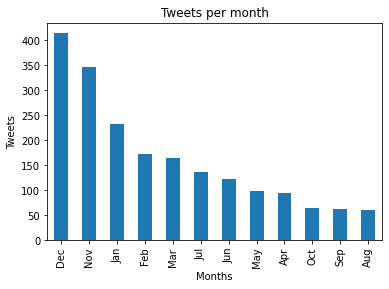

In [108]:
month_group = dfdogs.groupby("month").count().tweet_id
month_group = month_group.nlargest(12,)
month_group.plot(kind='bar',x='Month',y='Tweets')
plt.title('Tweets per month')
plt.xlabel('Months')
plt.ylabel("Tweets");

**The month with more tweets posted by WeRateDogs community is December.**

### Insight 2: Which dog breed is the most favorited?

In [106]:
fav_dogs = dfdogs.groupby(["p1"]).favorite_count.sum().reset_index()
fav_dogs

,p1,favorite_count
0,Acorn Squash,16114
1,Afghan Hound,51980
2,African Crocodile,994
3,African Grey,5350
4,African Hunting Dog,1763
...,...,...
368,Wood Rabbit,7605
369,Wooden Spoon,16037
370,Wool,3787
371,Yorkshire Terrier,41087


In [110]:
fav_dogs = fav_dogs.nlargest(10,"favorite_count")
fav_dogs

,p1,favorite_count
137,Golden Retriever,1693475
183,Labrador Retriever,1116811
246,Pembroke,994755
77,Chihuahua,673526
278,Samoyed,542991
129,French Bulldog,465738
80,Chow,404241
261,Pug,320223
85,Cocker Spaniel,315825
255,Pomeranian,299114


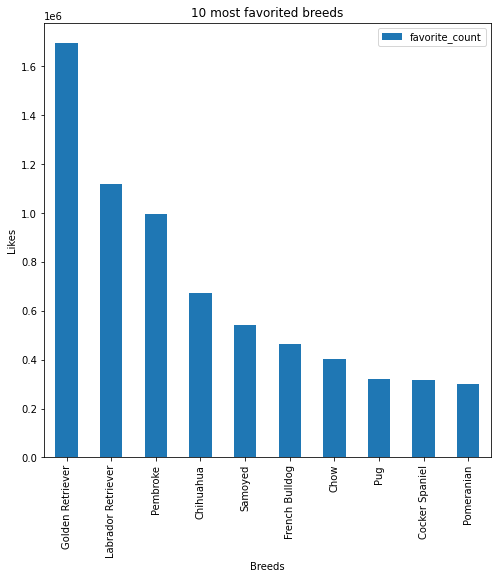

In [115]:
fav_dogs.plot(kind='bar',x='p1',y='favorite_count', figsize=(8,8))
plt.title('10 most favorited breeds')
plt.xlabel('Breeds')
plt.ylabel("Likes");

**The most favorited dog breed was Golden Retriever with 1,693,475 likes**

### Insight 3: What is the most common platform users tweet from?

In [273]:
dfdogs.source.unique()

array(['iPhone', 'Web Client', 'TweetDeck'], dtype=object)

In [281]:
platform = dfdogs.groupby("source").count().tweet_id.reset_index()
platform

,source,tweet_id
0,TweetDeck,11
1,Web Client,28
2,iPhone,1932


<AxesSubplot:ylabel='tweet_id'>

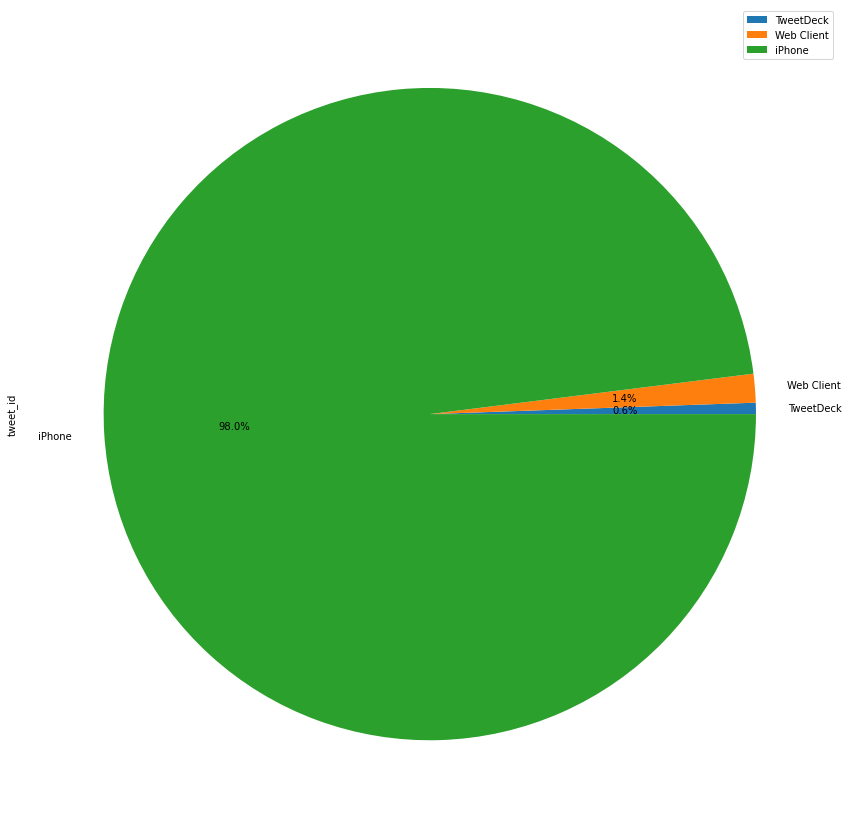

In [282]:
dfdogs.groupby("source").count().plot(kind='pie', y='tweet_id', figsize = (15,15), autopct='%1.1f%%')

**The most-used platform to tweet was Iphone with 98% of the posts.**

<a id='conclusions'></a>
# Conclusions

This project brought new and unique challenges in terms of gathering, assessing and cleaning the data. I was able to gather information from 3 different sources and load them in pandas. I was also able to combine the programmatic and visual data assessment in order to improve and detail the issues I found. Nevertheless, the gratest challenge I faced was to succesfully correct (clean) the found issues: it was not easy but very rewarding and helped me to put my problem-solving skills to the test.

It also introduced me to the twitter account WeRateDogs, a fun, interactive and safe community built around dogs, costumes and puns.

Regarding the findings in my analysis, it came to my attention than most users post from their phones (Iphones), instead of their web browser or twitter client. I infer that nowadays smartphones provide an easier option for users when using twitter because of the integrated camera and the inmediaty trend rooted in new generations. I was surprised when explored the most favorited dog breed because I thought people preferred smaller dogs (the most popular were Golden Retriever dogs).
Finally, when analyzing the amount of tweets per month, I discovered that December was the most common month to post. The reason behind this may be connected to winter holidays were people tend to stay home and have more free time to spend with their families and pets.

To summarize, this project was both challenging and fun to develop. I hope you also become a member of WeRateDogs community soon!
